
# 1 = problem description

The sinking of the RMS Titanicis one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage,the Titanic sank after colliding with an iceberg, killing 1502 out of 2224passengers and crew. This sensational tragedy shocked the internationalcommunity and led to better safety regulations for ships.

One of the reasons that theshipwreck led to such loss of life was that there were not enough lifeboats forthe passengers and crew. Although there was some element of luck involved insurviving the sinking, some groups of people were more likely to survive thanothers, such as women, children, and the upper-class.

In this challenge, we ask you tocomplete the analysis of what sorts of people were likely to survive. Inparticular, we ask you to apply the tools of machine learning to predict whichpassengers survived the tragedy.


主要是让参赛选手根据训练集中的乘客数据和存活情况进行建模，进而使用模型预测测试集中的乘客是否会存活。乘客特征总共有11个，以下列出。当然也可以根据情况自己生成新特征，这就是特征工程（featureengineering）要做的事情了。
PassengerId => 乘客ID
Pclass => 客舱等级(1/2/3等舱位)
Name => 乘客姓名
Sex => 性别
Age => 年龄
SibSp => 兄弟姐妹数/配偶数
Parch => 父母数/子女数
Ticket => 船票编号
Fare => 船票价格
Cabin => 客舱号
Embarked => 登船港口


Titanic和其他比赛比起来数据量算是很小的了，训练集合测试集加起来总共891+418=1309个。
我们需要注意因为数据少，所以要防止过拟合(overfitting)，一些算法如GradientBoostingTree的树的数量就不能太多


# 2 编程环境搭建

## 2-1 系统环境
Mac OS X or ubuntu

## 2-2 工具
jupyter notebook

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

import warnings
from numpy.core.umath_tests import inner1d

# 3 导入数据

## 3-1 下载数据

In [3]:
!cd /Users/c/Downloads/0_archive/3_A/3_A/6-机器学习\:/hw-final/titanic/solution_1
!kaggle competitions download -c titanic
!unzip -o titanic.zip

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## 3-2 导入

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3-3 数据个数统计

In [5]:
print("the number of data set is: ", train.shape[0]+test.shape[0])
print("the number of train set is: ", train.shape[0])
print("the number of test set is: ", test.shape[0])

the number of data set is:  1309
the number of train set is:  891
the number of test set is:  418


# 4 数据统计量分析

## 4-1 查看数据集的特征向量

In [6]:
print(train.columns.values)
print(test.columns.values)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
train.info()
print('--'*20)
test.info()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------


### 训练和测试的样本中包含的特征向量有11个

PassengerId：乘客序号

pclass: 船舱等级

Name：姓名

Sex：性别

Age：年龄

SibSp：船上兄弟姐妹和配偶的数量

Parch：船上父母和孩子的数量

Ticket： 船票编号

Fare：旅客票价

Cabin：机舱编号

Embarked： C=瑟堡，Q =皇后镇，S =南安普敦


### 输出变量

Survived：乘客生存为1，乘客死亡为0

按照原始的数据，我们可以将变特征向量分为以下五类：

分类变量：Sex, Embarked, pclass

连续变量：Age, Fare

离散变量：SibSp, Parch

其他变量：Name, PassengerId, Cabin,Ticket


### 按照数据类型可以分为三类：

float：Age, Fare

int：PassengerId, Survived, Pclass, SibSp, Parch

object：Name, Sex, Ticket, Cabin, Embarked


## 4-2 缺失值分析


In [7]:
print("--"*20)
print('Train columns with null values:\n', train.isnull().sum())
print("--"*20)

print('Test columns with null values:\n', test.isnull().sum())
print("--"*20)

----------------------------------------
Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------------------------------------


### 样本缺失

#### Age

训练样本891个中缺少177个

测试样本418个中缺少86个

#### Cabin

训练样本891个中缺少689个

测试样本418个中缺少327个

#### Embarked

训练样本891个中缺少2个，

测试样本中并未出现缺失

#### Fare

在测试样本中缺少1个数据

Age的样本个数缺失较少，但是推测Age和是否生存的关系较大，Age样本也许可以通过相关性较高的Pclass，Sex等变量推测；

Cabin中样本的缺少较多，但是推测Cabin和是否生存的相关性较小。

Embarked变量缺失两个，影响不大，考虑是否可以通过Ticket和Cabin两个变量进行推测

测试样本中缺少1个数据，可以用均值代替


## 4-3 样本的描述性统计量

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 4-3-1 数值型特征向量统计量分析

样本和测试变量的描述性统计量区别不大

两组数据的75%的分位数和最大值之间的却别相差过大

结论：样本中可能存在异常值

In [10]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### 4-3-2 字符型特征向量统计量分析

Name均不同，无异常

船上男性较多

Ticket(票号)和Carbin(仓位)存在相同编号，但个数较少

从S登船的乘客较多

# 5 特征工程

按照原始的数据，我们可以将变特征向量分为以下五类：

分类变量：Sex, Embarked, pclass

连续变量：Age, Fare

离散变量：SibSp, Parch

其他变量：Name, PassengerId, Cabin, Ticket

那么按照以上分类对数据进行分析，相对合理

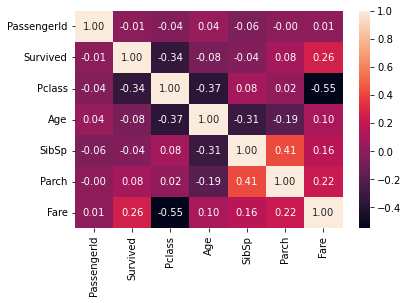

In [12]:
g = sns.heatmap(train.corr(),annot=True, fmt = ".2f")

## 5-1 分类变量

### 5-1-1 Sex


In [13]:
train[["Sex", "Survived"]].groupby(['Sex'],\
as_index=False).mean().sort_values(by='Survived', ascending=False) 

,Sex,Survived
0,female,0.742038
1,male,0.188908


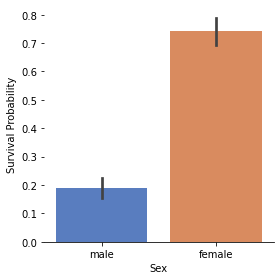

In [14]:
g = sns.catplot(x="Sex", y="Survived",  data=train, height=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

In [15]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


#### Age：

女性的存活率远高于男性的存活率

将Sex两个变量映射为：0，1

### 5-1-2 Pclass



In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


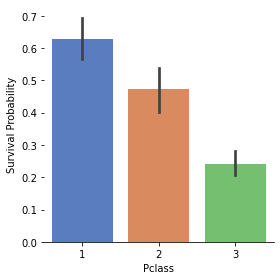

In [17]:
g = sns.catplot(x="Pclass", y="Survived",  data=train, height=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

Pclass： 
说明 仓位等级越高，存活率越高

### 5-1-3 Embarked

In [18]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [19]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].\
    map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


#### Embarked：

从C处登船的存活概率显著大于其他两地，Q，S两地登船的存活率类似

用众数填充Embarked的两个空值

将Embarked的三个字符型变量映射为：0，1，2

## 5-2 连续变量

### 5-2-1 Age

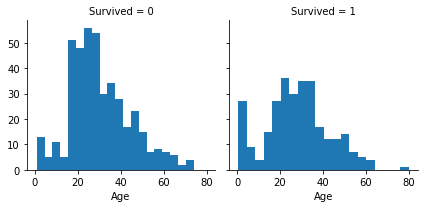

In [20]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)


In [21]:
from numpy import *
guess_ages = np.zeros((2,3))
guess_ages
array([[0., 0., 0.], [0., 0., 0.]])
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0


In [22]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False)\
.mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [23]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0


#### Age：

未存活的年龄分布较存活人的年龄分布较为集中

存活人的平均年龄大于未存活的人

小孩和中老年人容易生存

将Age空值，按照所处的船仓等级和性别进行分类

将年龄分为5个阶段，并映射到：0，1，2，3，4

### 5-2-2 Fare


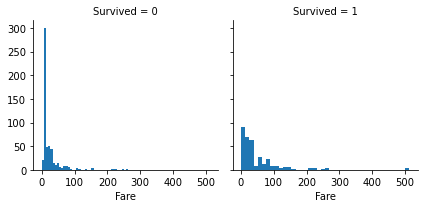

In [24]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=40)

In [25]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'],\
as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [26]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0


#### Fare:

票价越贵越容易生存

用测试样本的均值替补了测试样本中的均值

将票价分阶段映射到：0，1，2，3

## 5-3 离散变量


### 5-3-1 SibSp


对于离散变量的分析，代码和分类的变量类似，将分类变量的数值化以后，比如，将性别映射到0和1，就和离散的变量一样了，因此采用类似的分析方法。

In [27]:
train[["SibSp", "Survived"]].groupby(['SibSp'],\
as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


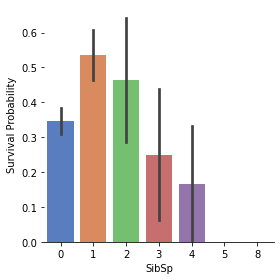

In [28]:
g = sns.catplot(x="SibSp", y="Survived",  data=train, height=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

### SibSp:

船上兄弟姐妹和配偶越多越不容易存活



### 5-3-2 Parch

In [29]:
train[["Parch", "Survived"]].groupby(['Parch'],\
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


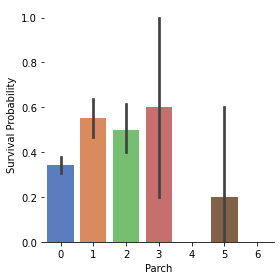

In [30]:
g = sns.catplot(x="Parch", y="Survived",  data=train, height=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

### Parch：

船上父母和孩子的数量在3个之内容易存活

## 5-4 其他变量

### 5-4-1 Name

In [31]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [32]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [33]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,0,NaN,0,1
1,2,1,1,1,2,1,0,PC 17599,3,C85,1,3
2,3,1,3,1,1,0,0,STON/O2. 3101282,1,NaN,0,2
3,4,1,1,1,2,1,0,113803,3,C123,0,3
4,5,0,3,0,2,0,0,373450,1,NaN,0,1


### Name：

提取船员名字的Title，因为Title一般情况首字母大写，然后再加小写字母

Title分为5类，映射到：1，2，3，4，5


### 5-4-2 Cabin&Ticket

仓位的编号和票号十分杂乱，这里选择直接从样本中剔除

In [34]:
train = train.drop(['Cabin','Ticket'], axis=1)
test = test.drop(['Cabin','Ticket'], axis=1)

## 5-5 Age, Class and Gender

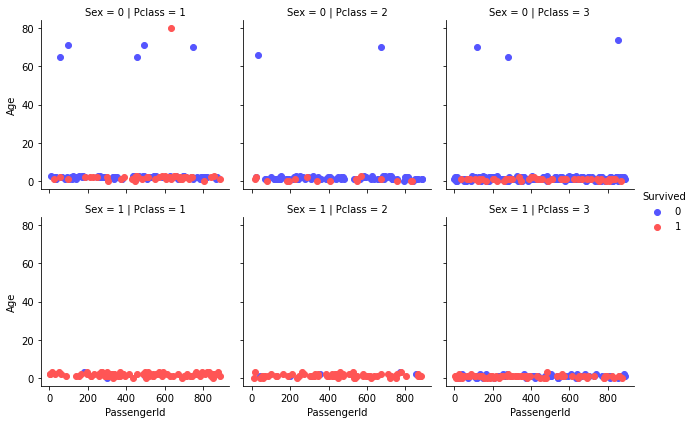

In [35]:
grid = sns.FacetGrid(train, col = "Pclass", row = "Sex", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

# 6 特征向量筛选


#### 在特征向量工程完毕，筛选特征向量：

1. 查看处理后的训练和测试样本中的向量

2. 剔除无用的特征向量

3. 查看相关性矩阵

4. 分离处特征向量

In [36]:
print(train.columns.values)
print(test.columns.values)
train = train.drop(['PassengerId'], axis=1)
train.shape,test.shape

['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked' 'Title']
['PassengerId' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked'
 'Title']


((891, 9), (418, 9))

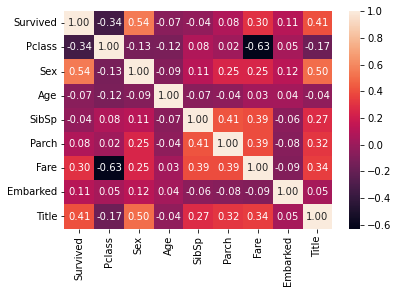

In [37]:
g = sns.heatmap(train.corr(),annot=True, fmt = ".2f")

In [38]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# 7 模型

一共建立九种模型，对样本进行测试：


## 7.1 Logistic Regression

In [92]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.69

In [107]:

Submission=pd.DataFrame()
Submission['PassengerId'] = test['PassengerId']
Submission['Survived'] = Y_pred
Submission = Submission.drop(columns=[])

Submission.to_csv('submission01.csv',sep=',',index=False)
Submission


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 7.2 Support Vector Machines

In [62]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.04

In [108]:

Submission=pd.DataFrame()
Submission['PassengerId'] = test['PassengerId']
Submission['Survived'] = Y_pred
Submission = Submission.drop(columns=[])

Submission.to_csv('submission02.csv',sep=',',index=False)
Submission



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 7.3 KNN

In [64]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.97

In [109]:

Submission=pd.DataFrame()
Submission['PassengerId'] = test['PassengerId']
Submission['Survived'] = Y_pred
Submission = Submission.drop(columns=[])

Submission.to_csv('submission03.csv',sep=',',index=False)
Submission



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 7.4 Naive Bayes

In [66]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.79

In [110]:

Submission=pd.DataFrame()
Submission['PassengerId'] = test['PassengerId']
Submission['Survived'] = Y_pred
Submission = Submission.drop(columns=[])

Submission.to_csv('submission04.csv',sep=',',index=False)
Submission



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 7.5 Perceptron

In [68]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.23

In [111]:

Submission=pd.DataFrame()
Submission['PassengerId'] = test['PassengerId']
Submission['Survived'] = Y_pred
Submission = Submission.drop(columns=[])

Submission.to_csv('submission05.csv',sep=',',index=False)
Submission



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 7.6 Linear SVC


In [70]:
linear_svc = LinearSVC(max_iter=1000000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.8

In [112]:

Submission=pd.DataFrame()
Submission['PassengerId'] = test['PassengerId']
Submission['Survived'] = Y_pred
Submission = Submission.drop(columns=[])

Submission.to_csv('submission06.csv',sep=',',index=False)
Submission



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 7.7 Stochastic Gradient Descent

In [72]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.99

In [113]:

Submission=pd.DataFrame()
Submission['PassengerId'] = test['PassengerId']
Submission['Survived'] = Y_pred
Submission = Submission.drop(columns=[])

Submission.to_csv('submission07.csv',sep=',',index=False)
Submission



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 7.8 Decision Tree

In [74]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.11

In [114]:

Submission=pd.DataFrame()
Submission['PassengerId'] = test['PassengerId']
Submission['Survived'] = Y_pred
Submission = Submission.drop(columns=[])

Submission.to_csv('submission08.csv',sep=',',index=False)
Submission



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 7.9 Random Forest

In [76]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.11

In [115]:

Submission=pd.DataFrame()
Submission['PassengerId'] = test['PassengerId']
Submission['Survived'] = Y_pred
Submission = Submission.drop(columns=[])

Submission.to_csv('submission09.csv',sep=',',index=False)
Submission



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 7.10 模型总结

In [78]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.11
8,Decision Tree,89.11
1,KNN,85.97
0,Support Vector Machines,82.04
7,Linear SVC,79.80
2,Logistic Regression,79.69
4,Naive Bayes,78.79
5,Perceptron,78.23
6,Stochastic Gradient Decent,76.99
